American Resturants

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Apply the default theme
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

sns.set_theme()

In [2]:
ls

archive.zip  sample_data/


In [3]:
import zipfile

# Replace 'your_zip_file.zip' with the name of your zip file
zip_file_path = 'archive.zip'

# Replace 'extracted_folder' with the name of the folder where you want to extract the files
extract_to_folder = 'data'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified folder
    zip_ref.extractall(extract_to_folder)

print("Archive has been extracted successfully.")

Archive has been extracted successfully.


In [4]:
data=pd.read_csv(r'data/North America Restaurants.csv')

In [5]:
data.describe()

,weighted_rating_value,aggregated_rating_count
count,1500.000000,1500.000000
mean,3.724533,85.500667
std,0.989005,277.071136
min,1.000000,1.000000
25%,2.900000,5.000000
50%,4.100000,25.000000
75%,4.600000,68.000000
max,5.000000,4211.000000


In [6]:
data.head(2)

,name,city,state,zipcode,country,cuisines,pickup_enabled,delivery_enabled,weighted_rating_value,aggregated_rating_count
0,Burger King,Manitowoc,WI,54220,US,"American, Burger, Burgers, Family Meals, Fast ...",True,True,2.4,42
1,Petro-Canada,Airdrie,AB,T4A,CA,"Ben & Jerry's, Café/Thé, Coffee/Tea, Convenien...",True,True,4.1,1


In [7]:
type(data['name'])

pandas.core.series.Series

In [8]:
data['name'].shape

(1500,)

In [9]:
#see the columns with NA values
data.isnull().sum()

name                       0
city                       0
state                      0
zipcode                    0
country                    0
cuisines                   1
pickup_enabled             0
delivery_enabled           0
weighted_rating_value      0
aggregated_rating_count    0
dtype: int64

In [10]:
def check(x):
  if x <= 0:
    return np.NaN
  else :
    return x

In [11]:
len(data[data['weighted_rating_value'].apply(lambda x :check(x)).isna()])

0

In [12]:
#check for all dataset and removes rows with null values
def check_columns_na(x):
    if x.isna().sum()>=1:
      print(x.name)
      data.drop(index=(x.name),axis=0,inplace=True)

    return
data.apply(lambda x:check_columns_na(x),axis=1)

633


0       None
1       None
2       None
3       None
4       None
        ... 
1495    None
1496    None
1497    None
1498    None
1499    None
Length: 1500, dtype: object

In [13]:
#all restaurant are rated
data.isna().sum()

name                       0
city                       0
state                      0
zipcode                    0
country                    0
cuisines                   0
pickup_enabled             0
delivery_enabled           0
weighted_rating_value      0
aggregated_rating_count    0
dtype: int64

check null columns

In [14]:
[col for col in data.columns if data[col].nunique() <= 1]

['delivery_enabled']

Remove delivery_enabled feature because it has one unique value , hence it will not add any insight to the model

In [15]:
data=data.drop(['delivery_enabled'],axis=1)

In [16]:
data.columns

Index(['name', 'city', 'state', 'zipcode', 'country', 'cuisines',
       'pickup_enabled', 'weighted_rating_value', 'aggregated_rating_count'],
      dtype='object')

In [17]:
data['name'].value_counts()

Petro-Canada             208
Starbucks                 78
A&W                       33
McDonald's                29
Montana's                 29
                        ... 
Oak & Stone                1
Jamaican Jerk Kitchen      1
Kin Dee Seattle            1
Chevron Extramile          1
Denny's                    1
Name: name, Length: 596, dtype: int64

In [18]:
[col for col in data.columns if data[col].nunique()<=1]

[]

In [19]:
data[['name','pickup_enabled']] #the inner brackets are a ist of columns and the outer are the rows selected from the

,name,pickup_enabled
0,Burger King,True
1,Petro-Canada,True
2,Boba Bae,True
3,1001 Nights Shawarma,True
4,Chirpyhut Fried Chicken (JlgJ),True
...,...,...
1495,Grandma's Soul Food,True
1496,Jimbob's Pizza,False
1497,Petro-Canada,True
1498,Denny's,True


In [20]:
# i want to know rate of Mcdonalds in us and ca





2.   Which restaurant has the pick up lines enabled?
1. The pourcentage of us restaurant that has the delivery enabled?






2-Which restaurant has the pick up lines enabled?

In [21]:
len(list(data[data['pickup_enabled']==True].index))

1158

3-The pourcentage of us restaurant that has the picked line enabled?

In [22]:
data[(data['country']=='US') & (data['pickup_enabled']==True)].head(2)

,name,city,state,zipcode,country,cuisines,pickup_enabled,weighted_rating_value,aggregated_rating_count
0,Burger King,Manitowoc,WI,54220,US,"American, Burger, Burgers, Family Meals, Fast ...",True,2.4,42
2,Boba Bae,Ashwaubenon,WI,54304,US,"American, Asian Food, Bubble Tea, Coffee & Tea...",True,4.0,88


In [23]:
total=data['name'].count()

In [24]:
nb_us_pickedline=len(data[(data['country']=='US') & (data['pickup_enabled']==True)].index)

In [25]:
pr_us_pickedline=(nb_us_pickedline/total)*100
print(f'pourcentage od us restaurant that picked line is {pr_us_pickedline}%')

pourcentage od us restaurant that picked line is 37.22481654436291%


Choose the best features and see how features align with each other,
1-who's the restaurant that has the highest rating (country,cuisine)

In [26]:
data['weighted_rating_value']

0       2.4
1       4.1
2       4.0
3       4.6
4       4.6
       ... 
1495    2.0
1496    4.1
1497    4.5
1498    3.4
1499    4.8
Name: weighted_rating_value, Length: 1499, dtype: float64

i write a function that modify the rating of restaurant
"value.fvalue " if fvalue<5 =>rating =value+1 else
rating =value  and add this clumn to the dataset so i will have rating from (0 to 5) and i will create the label of dataset

In [27]:
def frt(x):
  return np.round(x['weighted_rating_value'])

In [28]:
label_column=data.apply(frt,axis=1)

In [29]:
label_column

0       2.0
1       4.0
2       4.0
3       5.0
4       5.0
       ... 
1495    2.0
1496    4.0
1497    4.0
1498    3.0
1499    5.0
Length: 1499, dtype: float64

In [30]:
data.insert(9,'rating',label_column)

In [31]:
data.head(2)

,name,city,state,zipcode,country,cuisines,pickup_enabled,weighted_rating_value,aggregated_rating_count,rating
0,Burger King,Manitowoc,WI,54220,US,"American, Burger, Burgers, Family Meals, Fast ...",True,2.4,42,2.0
1,Petro-Canada,Airdrie,AB,T4A,CA,"Ben & Jerry's, Café/Thé, Coffee/Tea, Convenien...",True,4.1,1,4.0


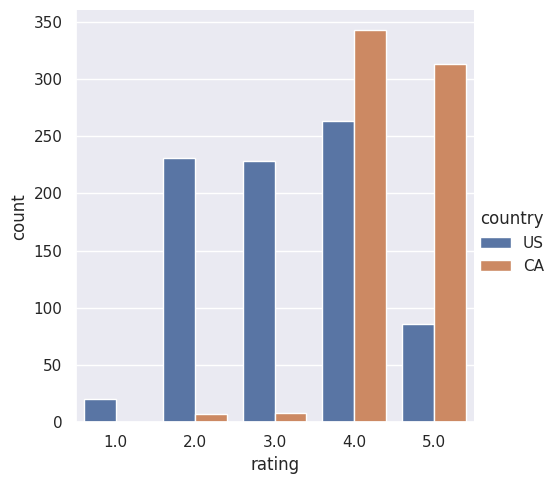

In [32]:
sns.catplot(data=data, x="rating", kind="count",hue='country')

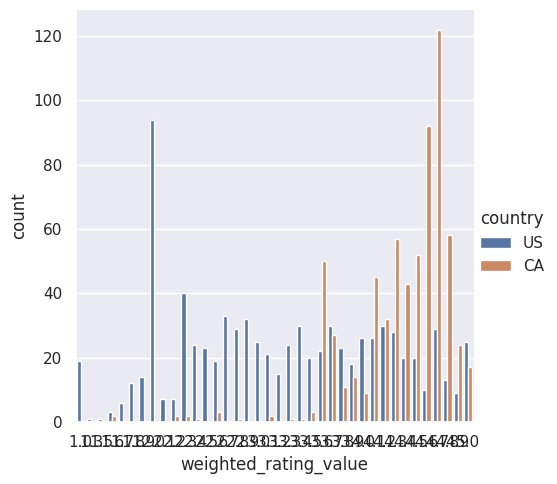

In [33]:
sns.catplot(data=data, x="weighted_rating_value", kind="count",hue='country')

In [34]:
#we could see the picked line feature if he impact the rating

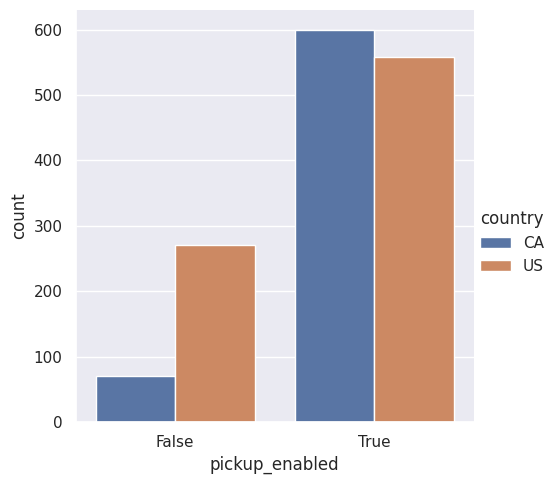

In [35]:
sns.catplot(data,x='pickup_enabled',kind='count',hue='country')
#we can see the CA country has a larger picked line than us
#i want to see in each country the picked line count and

calcuate the number of True and false picked line in each country

In [36]:
sns.catplot(fdr,x='rating',kind='count',hue='country')

NameError: name 'fdr' is not defined

In [ ]:
#data[(data['country']=='US') & (data['pickup_enabled']==True)]

In [ ]:
def count_rating_country(x):
 #print(x[x['country']=='CA'])
 return x

In [ ]:
fty=data.groupby(['country'],group_keys=True)[['pickup_enabled','rating']].apply(count_rating_country)

In [ ]:
sns.displot(data=fty,  x="country", col="rating", hue="pickup_enabled", rug=True)

In [ ]:
data.groupby(['pickup_enabled','country'],group_keys=True)[['weighted_rating_value']].mean()

we see that the country feature does impact the rating , we observe that all the >4 rating restaurant has the picked_enabled is true , hence this feature is also a good feature

we sill analyze the name feature and the cuisine feature

In [ ]:
type(data['name'].value_counts())

In [ ]:
data['name'].value_counts().index

In [ ]:
data.head(2)

In [ ]:
ss=data['name'].value_counts()

In [ ]:
ss[ss>10]

In [ ]:
famous_rest=data

#i want to see how pickup_enbaled feature impact famous restaurant rating?

1. Select restaurant that appears more than 10 times in dataset.
2. Visualize the other restaurant by (rating and pickup enabled)


In [37]:
ss=data['name'].value_counts()

In [38]:
data['name'].value_counts()>10

Petro-Canada              True
Starbucks                 True
A&W                       True
McDonald's                True
Montana's                 True
                         ...  
Oak & Stone              False
Jamaican Jerk Kitchen    False
Kin Dee Seattle          False
Chevron Extramile        False
Denny's                  False
Name: name, Length: 596, dtype: bool

In [39]:
famous_restaurant=ss[data['name'].value_counts()>10].index

In [40]:
data_top_rstaurant=data[data['name'].isin(famous_restaurant)]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 95.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.1% of the points cannot be plac

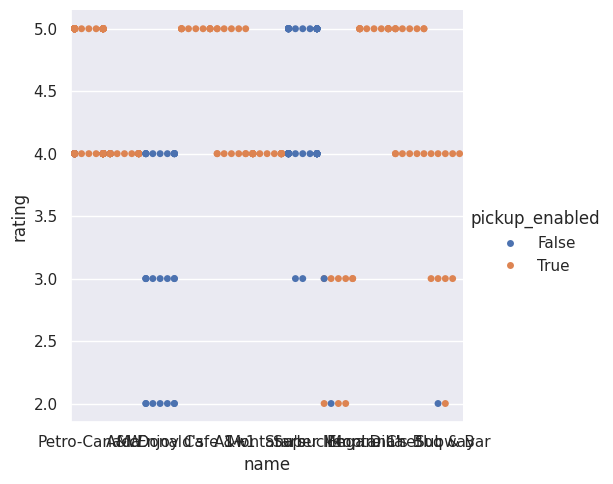

In [41]:
sns.catplot(data=data_top_rstaurant, x="name", y="rating", hue="pickup_enabled", kind="swarm")

In [42]:
#sns.relplot(data=data_top_rstaurant, x="name", y="rating", hue="pickup_enabled")

## Select the relevant and the best restaurant from the dataset :⚓




1.   .Does aggregated_rating_count feature impact the rating of the restaurats?
2. Convert name of restaurant to numerical variables
3. create the algorithm that will select the best restaurant ⁉


* Restaurants that has a larger number of rating while it has the hihest  mean of all of its rating.
*After seecting these restaurant we can observe which features impact them by visualize the relation ship between their features





In [43]:
def calculate_mean_rating(x):
  #print(f"mean rating : {x['rating'].mean()}")
  return pd.DataFrame({'aggregated_rating_count':x['aggregated_rating_count'],'mean_rating':x['rating'].mean()})

In [44]:
result=data.groupby(['name'],group_keys=True)[['aggregated_rating_count','rating']].apply(calculate_mean_rating)

In [45]:
result = result.sort_values(by=['aggregated_rating_count'],ascending=False)
result

aggregated_rating_count  mean_rating
name                                                                
Applebee's                242                      4211     4.200000
Ohop Orono House Of Pizza 1126                     4208     4.000000
New York Pizza Factory    1399                     3521     2.000000
                          27                       3521     2.000000
Libertad Restaurant       280                      3497     5.000000
...                                                 ...          ...
Petro-Canada              1267                        1     4.418269
                          1264                        1     4.418269
                          1263                        1     4.418269
                          1255                        1     4.418269
                          1381                        1     4.418269

[1499 rows x 2 columns]

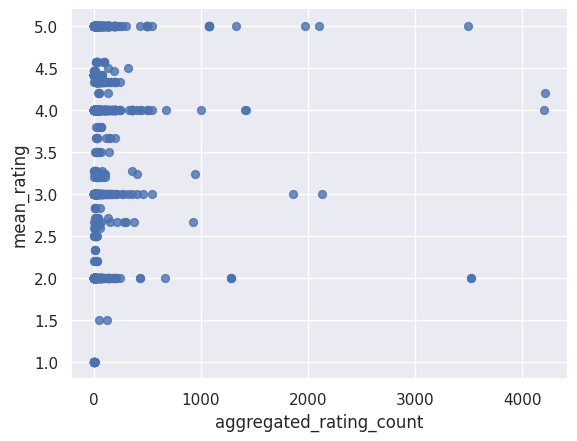

In [46]:
from matplotlib import pyplot as plt
result.plot(kind='scatter', x='aggregated_rating_count', y='mean_rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

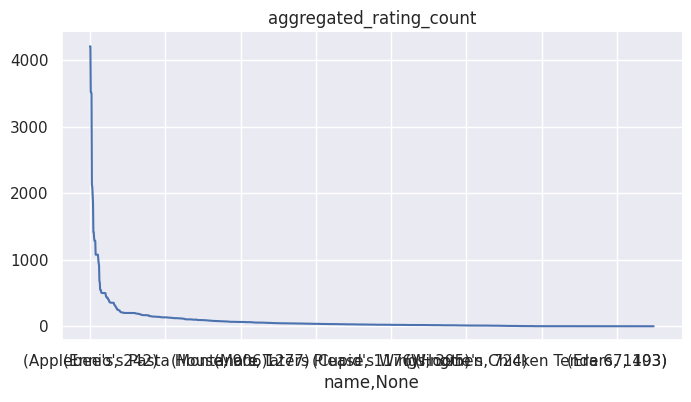

In [47]:
from matplotlib import pyplot as plt
result['aggregated_rating_count'].plot(kind='line', figsize=(8, 4), title='aggregated_rating_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [53]:
data.head(3)

,name,city,state,zipcode,country,cuisines,pickup_enabled,weighted_rating_value,aggregated_rating_count,rating
0,Burger King,Manitowoc,WI,54220,US,"American, Burger, Burgers, Family Meals, Fast ...",True,2.4,42,2.0
1,Petro-Canada,Airdrie,AB,T4A,CA,"Ben & Jerry's, Café/Thé, Coffee/Tea, Convenien...",True,4.1,1,4.0
2,Boba Bae,Ashwaubenon,WI,54304,US,"American, Asian Food, Bubble Tea, Coffee & Tea...",True,4.0,88,4.0


In [54]:
data_1=data.drop(['weighted_rating_value','cuisines'],inplace=False,axis=1)

## **Features Selection :**



1.   Select Categorical features and convert them to numerical variables.
2.   implement PCA for unsupervised features selection



I have this idea of analYze the fequencies of city and observe its relationship with rating.

In [48]:
#get categorial features to numerical features
data.dtypes[data.dtypes=='object'].index

Index(['name', 'city', 'state', 'zipcode', 'country', 'cuisines'], dtype='object')

In [49]:
result=data.groupby('city')[['state']].count()
result

,state
city,
Abilene,1
Acworth,1
Airdrie,21
Akron,1
Albuquerque,2
...,...
Windsor,15
Winnipeg,9
Woodbury,1


In [50]:
result.sort_values(by='state',ascending=False)

,state
city,
Edmonton,55
Montréal,41
Vancouver,28
Waterloo,25
Richmond,25
...,...
Jackson Hole,1
Jackson,1
Jackasonville,1


In [ ]:
#cities with more than 5 occurences in the dataset
list(result[result.sort_values(by=['state'],ascending=False)['state']>5].index)

<ipython-input-115-d09c14075f12>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(result[result.sort_values(by=['state'],ascending=False)['state']>5].index)


['Airdrie',
 'Aurora',
 'Austin',
 'Barrie',
 'Blainville',
 'Bowmanville',
 'Bradenton',
 'Brampton',
 'Burlington',
 'Burnaby',
 'Calgary',
 'Chestermere',
 'Chicago',
 'Chilliwack',
 'Coquitlam',
 'Edmonton',
 'Fort Myers',
 'Gatineau',
 'Greenville',
 'Halifax',
 'Honolulu',
 'Jacksonville',
 'Kitchener',
 'Las Vegas',
 'Leduc',
 'London',
 'Los Angeles',
 'Madison',
 'Markham',
 'Memphis',
 'Miami',
 'Mirabel',
 'Montréal',
 'Nashville',
 'New York',
 'Newmarket',
 'Oakville',
 'Orillia',
 'Orlando',
 'Philadelphia',
 'Pittsburgh',
 'Red Deer',
 'Regina',
 'Richmond',
 'Richmond Hill',
 'Sainte-Thérèse',
 'San Antonio',
 'San Diego',
 'Saskatoon',
 'Seattle',
 'Spruce Grove',
 'St. Albert',
 'St. Catharines',
 'Surrey',
 'Tallahassee',
 'Tampa',
 'Thunder Bay',
 'Toronto',
 'Vancouver',
 'Waterloo',
 'Windsor',
 'Winnipeg']

### Convert all categorical features to numerical variables:
 *we will use one hot encoded endcoding

In [86]:
#len(list(result.index))

print(f"we have {data['city'].nunique()} city")

we have 507 city


In [90]:
[ col for col in data_1.columns]

['name',
 'city',
 'state',
 'zipcode',
 'country',
 'pickup_enabled',
 'aggregated_rating_count',
 'rating']

We want to check if the city feature is a relevant feature or not? we will check it relationship to the target feature 'rating'

In [ ]:
city_feature=data[['city']]
city_feature

,city
0,Manitowoc
1,Airdrie
2,Ashwaubenon
3,Kitchener
4,Richmond
...,...
1495,Richmond
1496,Eau Claire
1497,Longueuil
1498,Kingman


In [ ]:
city_feature.iloc[1498]

city    Richmond Hill
Name: 1499, dtype: object

In [ ]:
enc = OneHotEncoder(sparse_output=False)
cc=enc.fit_transform(city_feature)

In [ ]:
cc[1498]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
enc.get_feature_names_out()

array(['city_Abilene', 'city_Acworth', 'city_Airdrie', 'city_Akron',
       'city_Albuquerque', 'city_Alexandria', 'city_Alhambra',
       'city_Allentown', 'city_Altamonte Springs', 'city_American Fork',
       'city_Americus', 'city_Ames', 'city_Amherst', 'city_Anchorage',
       'city_Angleton', 'city_Antioch', 'city_Appleton',
       'city_Arden Hills', 'city_Arlington', 'city_Ashwaubenon',
       'city_Atlanta', 'city_Atlantic City', 'city_Attleboro',
       'city_Auburn', 'city_Aurora', 'city_Austin', 'city_Aventura',
       'city_Avondale', 'city_Bakersfield', 'city_Baltimore',
       'city_Bangor', 'city_Barrie', 'city_Bella Vista', 'city_Bellevue',
       'city_Bensenville', 'city_Bentonville', 'city_Berkeley',
       'city_Bessemer', 'city_Bethesda', 'city_Beverly Hills',
       'city_Biloxi', 'city_Binghamton', 'city_Bismarck', 'city_Blaine',
       'city_Blainville', 'city_Bloomington', 'city_Boone', 'city_Boston',
       'city_Boulder', 'city_Bowmanville', 'city_Boynton Be

In [ ]:
one_hot_encode_df=pd.DataFrame(cc,columns=enc.get_feature_names_out())

In [ ]:
one_hot_encode_df

,city_Abilene,city_Acworth,city_Airdrie,city_Akron,city_Albuquerque,city_Alexandria,city_Alhambra,city_Allentown,city_Altamonte Springs,city_American Fork,...,city_Whitby,city_Whittier,city_Wichita,city_Williamsport,city_Wilson,city_Windsor,city_Winnipeg,city_Woodbury,city_Woodruff,city_Worth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Reset index of both DataFrames
data.reset_index(drop=True, inplace=True)
one_hot_encode_df.reset_index(drop=True, inplace=True)

In [ ]:
data_1=pd.concat([data,one_hot_encode_df],axis=1,)

In [ ]:
data.iloc[1498]

name                                                              Bean House
city                                                           Richmond Hill
state                                                                     ON
zipcode                                                              L4B 3Z1
country                                                                   CA
cuisines                   Alcohol, Asian, Asian Fusion, Chinese, Dessert...
pickup_enabled                                                          True
weighted_rating_value                                                    4.8
aggregated_rating_count                                                   93
rating                                                                   5.0
Name: 1499, dtype: object

In [ ]:
one_hot_encode_df['city_Worth'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [85]:
data_1

,name,city,state,zipcode,country,pickup_enabled,aggregated_rating_count,rating
0,Burger King,Manitowoc,WI,54220,US,True,42,2.0
1,Petro-Canada,Airdrie,AB,T4A,CA,True,1,4.0
2,Boba Bae,Ashwaubenon,WI,54304,US,True,88,4.0
3,1001 Nights Shawarma,Kitchener,ON,N2C,CA,True,1077,5.0
4,Chirpyhut Fried Chicken (JlgJ),Richmond,BC,V6X 2B8,CA,True,30,5.0
...,...,...,...,...,...,...,...,...
1495,Grandma's Soul Food,Richmond,VA,23234,US,True,5,2.0
1496,Jimbob's Pizza,Eau Claire,WI,54701,US,False,127,4.0
1497,Petro-Canada,Longueuil,QC,J4V,CA,True,47,4.0
1498,Denny's,Kingman,AZ,86401,US,True,22,3.0


In [ ]:
correlation_matrix[correlation_matrix.columns[correlation_matrix.columns.str.startswith('city_')]]

,city_Abilene,city_Acworth,city_Airdrie,city_Akron,city_Albuquerque,city_Alexandria,city_Alhambra,city_Allentown,city_Altamonte Springs,city_American Fork,...,city_Whitby,city_Whittier,city_Wichita,city_Williamsport,city_Wilson,city_Windsor,city_Winnipeg,city_Woodbury,city_Woodruff,city_Worth
pickup_enabled,-0.047613,0.014021,0.064684,0.014021,-0.023761,0.014021,-0.082522,0.014021,0.014021,0.014021,...,-0.047613,-0.047613,-0.047613,-0.047613,-0.047613,0.038569,0.021575,-0.047613,-0.047613,-0.047613
weighted_rating_value,0.007179,-0.008504,0.068146,-0.021573,-0.041612,-0.008504,-0.078162,-0.045097,-0.003276,-0.000663,...,0.022861,-0.045097,-0.026800,-0.024187,0.001951,0.089636,0.011984,-0.018959,-0.008504,-0.024187
aggregated_rating_count,-0.004062,-0.003502,-0.027979,-0.002103,-0.009968,-0.007046,-0.013505,0.000694,-0.005834,0.010020,...,-0.001917,-0.007326,-0.003689,-0.005927,-0.005554,-0.022555,-0.010161,-0.007419,-0.006113,-0.006113
rating,0.006083,-0.018365,0.028066,-0.018365,-0.043273,-0.018365,-0.074203,-0.042813,0.006083,0.006083,...,0.030531,-0.042813,-0.018365,-0.018365,0.006083,0.074409,0.018299,-0.018365,-0.018365,-0.018365
city_Abilene,1.000000,-0.000668,-0.003080,-0.000668,-0.000944,-0.000668,-0.001157,-0.000668,-0.000668,-0.000668,...,-0.000668,-0.000668,-0.000668,-0.000668,-0.000668,-0.002598,-0.002008,-0.000668,-0.000668,-0.000668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
city_Windsor,-0.002598,-0.002598,-0.011984,-0.002598,-0.003675,-0.002598,-0.004502,-0.002598,-0.002598,-0.002598,...,-0.002598,-0.002598,-0.002598,-0.002598,-0.002598,1.000000,-0.007814,-0.002598,-0.002598,-0.002598
city_Winnipeg,-0.002008,-0.002008,-0.009264,-0.002008,-0.002841,-0.002008,-0.003480,-0.002008,-0.002008,-0.002008,...,-0.002008,-0.002008,-0.002008,-0.002008,-0.002008,-0.007814,1.000000,-0.002008,-0.002008,-0.002008
city_Woodbury,-0.000668,-0.000668,-0.003080,-0.000668,-0.000944,-0.000668,-0.001157,-0.000668,-0.000668,-0.000668,...,-0.000668,-0.000668,-0.000668,-0.000668,-0.000668,-0.002598,-0.002008,1.000000,-0.000668,-0.000668
city_Woodruff,-0.000668,-0.000668,-0.003080,-0.000668,-0.000944,-0.000668,-0.001157,-0.000668,-0.000668,-0.000668,...,-0.000668,-0.000668,-0.000668,-0.000668,-0.000668,-0.002598,-0.002008,-0.000668,1.000000,-0.000668


In [ ]:
rating_city_correlation=correlation_matrix['rating'][correlation_matrix.columns[correlation_matrix.columns.str.startswith('city_')]]

In [ ]:
rating_city_correlation

city_Abilene        0.006083
city_Acworth       -0.018365
city_Airdrie        0.028066
city_Akron         -0.018365
city_Albuquerque   -0.043273
                      ...   
city_Windsor        0.074409
city_Winnipeg       0.018299
city_Woodbury      -0.018365
city_Woodruff      -0.018365
city_Worth         -0.018365
Name: rating, Length: 507, dtype: float64

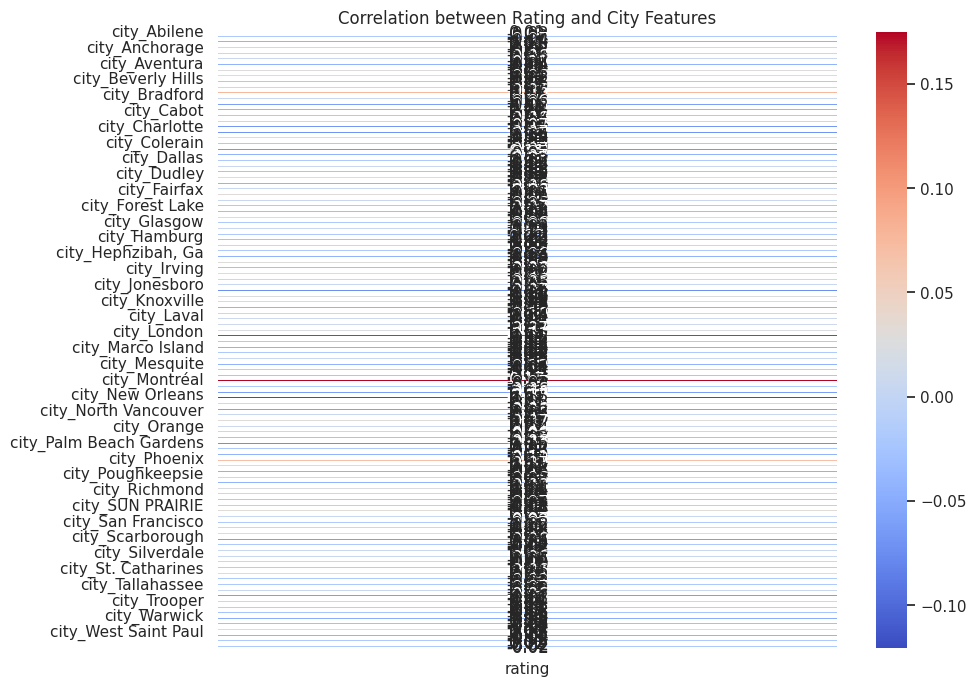

In [ ]:
# Create a heatmap for the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(rating_city_correlation), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Rating and City Features')
plt.show()

In [ ]:
print(correlation_matrix['rating'])

pickup_enabled             0.171884
weighted_rating_value      0.961559
aggregated_rating_count    0.026854
rating                     1.000000
city_Abilene               0.006083
                             ...   
city_Windsor               0.074409
city_Winnipeg              0.018299
city_Woodbury             -0.018365
city_Woodruff             -0.018365
city_Worth                -0.018365
Name: rating, Length: 511, dtype: float64


In [ ]:
data_2=data_1.drop(['city'],axis=1)

In [ ]:
data_2.dtypes[data_2.dtypes=='object']

name        object
state       object
zipcode     object
country     object
cuisines    object
dtype: object

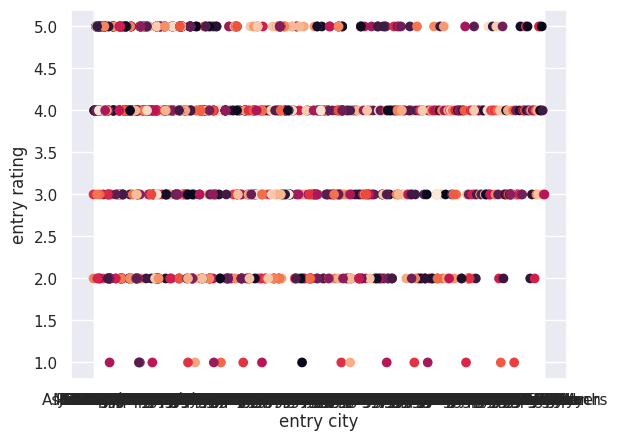

In [ ]:
N=1499
colors = np.random.rand(N)
plt.scatter('city', 'rating', c=colors,  data=data)
plt.xlabel('entry city')
plt.ylabel('entry rating')
plt.show()

### Decision Trees with dataset
 ##### First we convert all categorical features to numerics with one hot encoded

In [122]:
x_data=data_1.iloc[:,:7]
y_data=data_1[['rating']]

In [123]:
cat_features=list(x_data.dtypes[x_data.dtypes=='object'].index)
cat_features

['name', 'city', 'state', 'zipcode', 'country']

In [116]:
x_data_11= x_data.reset_index(drop=True)

In [124]:
def convert_categorical_features(x):

   enc =OneHotEncoder(sparse_output=False)
   cc=enc.fit_transform(x.values.reshape(-1,1))
   one_hot_encode_df=pd.DataFrame(cc,columns=enc.get_feature_names_out())
   one_hot_encode_df.reset_index(drop=True, inplace=True)
   return one_hot_encode_df



In [125]:
# Reset index of both DataFrames
x_data.reset_index(drop=True, inplace=True)


In [126]:
xdata_1=pd.concat([convert_categorical_features(x_data[col]) for col in cat_features],axis=1)

In [127]:
data_new=pd.concat([x_data,xdata_1],axis=1)

In [135]:
xdata_new=data_new.drop(cat_features,axis=1)

In [136]:
xdata_new

,pickup_enabled,aggregated_rating_count,x0_1001 Nights Shawarma,x0_168 Sushi Buffet,x0_2 For 1 Pizza House,x0_24/7 Gourmet Pizza,x0_280 Marathon,x0_3 Amigos,x0_3 Brasseurs,x0_3 Brothers Shawarma & Poutine,...,x0_V5Y,x0_V5Z 1G1,x0_V6X,x0_V6X 2B8,x0_V6X 4C4,x0_V7N 3J3,x0_V7P,x0_V8Z 0B9,x0_CA,x0_US
0,True,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,True,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,True,88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,True,1077,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,True,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,True,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1495,False,127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1496,True,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1497,True,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [137]:
#split the dataset into train and test partition
X_train_ ,X_test_ ,y_train_, y_test_ = train_test_split(xdata_new,y_data,test_size=0.2, random_state=42)

In [138]:
print(f'Training dataset :  {X_train_.shape}')
print(f'Testing dataset :  {X_test_.shape}')

Training dataset :  (1199, 1946)
Testing dataset :  (300, 1946)


In [140]:
clf = DecisionTreeClassifier()

In [141]:
# Train Decision Tree Classifer
clf = clf.fit(X_train_,y_train_)

In [142]:
#Predict the response for test dataset
y_pred = clf.predict(X_test_)

In [143]:
y_pred

array([3., 5., 5., 5., 5., 3., 2., 4., 4., 5., 4., 5., 3., 2., 2., 2., 2.,
       5., 3., 2., 3., 2., 2., 3., 2., 5., 4., 3., 5., 3., 4., 5., 2., 5.,
       2., 5., 2., 4., 5., 4., 5., 4., 5., 5., 5., 4., 4., 2., 4., 4., 3.,
       2., 4., 4., 1., 4., 3., 4., 3., 4., 4., 4., 5., 2., 3., 5., 3., 4.,
       5., 5., 5., 5., 5., 2., 3., 4., 4., 4., 3., 4., 5., 3., 5., 5., 4.,
       5., 4., 5., 4., 3., 5., 4., 3., 3., 4., 3., 5., 4., 4., 2., 5., 4.,
       5., 4., 5., 5., 3., 5., 4., 2., 5., 5., 2., 4., 3., 5., 4., 5., 5.,
       4., 5., 4., 5., 4., 4., 4., 3., 3., 2., 2., 5., 3., 4., 2., 4., 4.,
       4., 5., 3., 4., 3., 4., 4., 3., 4., 4., 3., 4., 5., 5., 2., 5., 5.,
       4., 3., 5., 2., 4., 2., 5., 4., 3., 5., 4., 5., 5., 4., 4., 2., 3.,
       3., 5., 3., 4., 4., 4., 4., 3., 2., 3., 3., 5., 3., 5., 2., 4., 2.,
       4., 3., 4., 4., 5., 5., 4., 3., 2., 5., 4., 4., 4., 4., 3., 5., 5.,
       5., 3., 3., 4., 3., 3., 5., 5., 2., 2., 4., 4., 4., 5., 5., 4., 4.,
       3., 4., 4., 3., 4.

In [144]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_, y_pred))

Accuracy: 0.6866666666666666
